## Subject 1: MNIST Clustering

1. Download the MNIST data set using the code below.
2. Ignoring the label normally associated to the dataset, construct a clustering of the data. Your clustering should maximize the v-score measure relative to true data labels (
    Paper describing the measure: https://www.aclweb.org/anthology/D07-1043.pdf
    Implementation available in python: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score
). Note that failing to ignore the labels during training will void your score for this subject.

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y= fetch_openml('mnist_784', version=1, return_X_y=True)
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [2]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


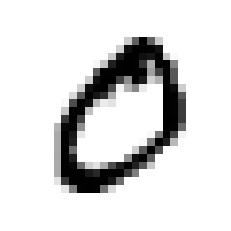

In [5]:
#Pentru a ne face o idee de cum arată, le vom face plot primelor 10.

import matplotlib.pyplot as plt
from matplotlib.cm import binary

some_digit_image = X[1].reshape(28,28)
plt.imshow(some_digit_image, cmap=binary, interpolation="nearest")
plt.axis('off')
plt.show()

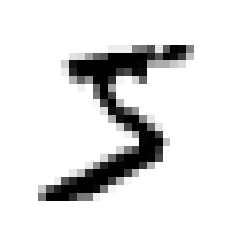

In [4]:
import matplotlib.pyplot as plt
from matplotlib.cm import binary

some_digit_image = X[0].reshape(28,28)
plt.imshow(some_digit_image, cmap=binary, interpolation="nearest")
plt.axis('off')
plt.show()

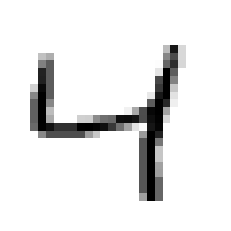

In [6]:
import matplotlib.pyplot as plt
from matplotlib.cm import binary

some_digit_image = X[2].reshape(28,28)
plt.imshow(some_digit_image, cmap=binary, interpolation="nearest")
plt.axis('off')
plt.show()

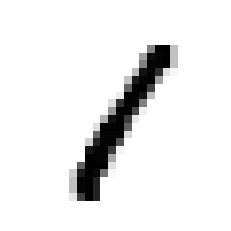

In [7]:
import matplotlib.pyplot as plt
from matplotlib.cm import binary

some_digit_image = X[3].reshape(28,28)
plt.imshow(some_digit_image, cmap=binary, interpolation="nearest")
plt.axis('off')
plt.show()

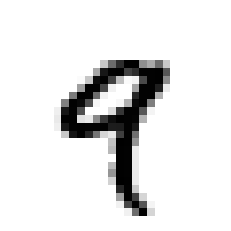

In [8]:
import matplotlib.pyplot as plt
from matplotlib.cm import binary

some_digit_image = X[4].reshape(28,28)
plt.imshow(some_digit_image, cmap=binary, interpolation="nearest")
plt.axis('off')
plt.show()

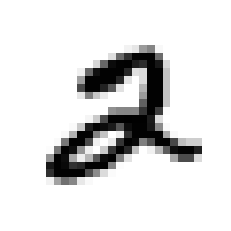

In [9]:
import matplotlib.pyplot as plt
from matplotlib.cm import binary

some_digit_image = X[5].reshape(28,28)
plt.imshow(some_digit_image, cmap=binary, interpolation="nearest")
plt.axis('off')
plt.show()

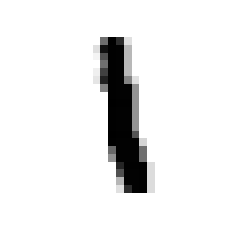

In [10]:
import matplotlib.pyplot as plt
from matplotlib.cm import binary

some_digit_image = X[6].reshape(28,28)
plt.imshow(some_digit_image, cmap=binary, interpolation="nearest")
plt.axis('off')
plt.show()

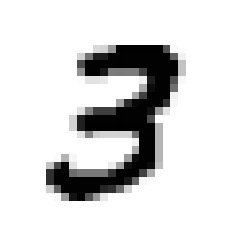

In [11]:
import matplotlib.pyplot as plt
from matplotlib.cm import binary

some_digit_image = X[7].reshape(28,28)
plt.imshow(some_digit_image, cmap=binary, interpolation="nearest")
plt.axis('off')
plt.show()

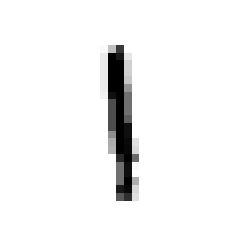

In [12]:
import matplotlib.pyplot as plt
from matplotlib.cm import binary

some_digit_image = X[8].reshape(28,28)
plt.imshow(some_digit_image, cmap=binary, interpolation="nearest")
plt.axis('off')
plt.show()

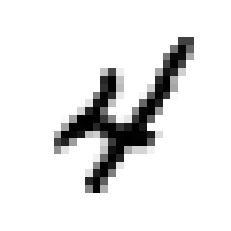

In [13]:
import matplotlib.pyplot as plt
from matplotlib.cm import binary

some_digit_image = X[9].reshape(28,28)
plt.imshow(some_digit_image, cmap=binary, interpolation="nearest")
plt.axis('off')
plt.show()

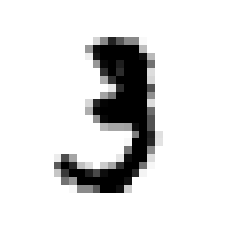

In [14]:
import matplotlib.pyplot as plt
from matplotlib.cm import binary

some_digit_image = X[10].reshape(28,28)
plt.imshow(some_digit_image, cmap=binary, interpolation="nearest")
plt.axis('off')
plt.show()

In [15]:
#Grupăm aceste date în 10 grupuri diferite (10 clusters)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(X.data)
kmeans.cluster_centers_.shape

(10, 784)

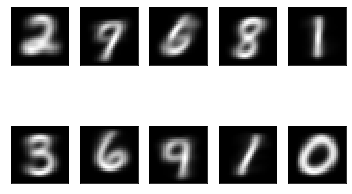

In [16]:
#Deci, avem zece centre de cluster, care sunt imagini cu 28x28 = 784 pixeli în ele.
#Putem arunca o privire asupra aspectului lor:
fig, axes = plt.subplots(2,5, subplot_kw=dict(xticks=[], yticks=[]))
for ax, digit in zip(axes.flat, kmeans.cluster_centers_):
    ax.imshow(digit.reshape(28,28), cmap="gray")

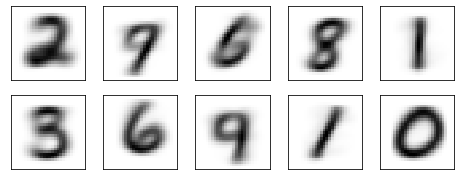

In [17]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
#Se pot recunoaște aceste numere, cu excepția numerelor 4 și 7. Care este precizia acestui grup?

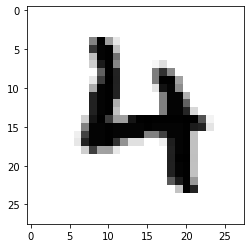

In [18]:
#Există 70000 de numere, fiecare stocat ca un tablou de 784 de numere care prezintă opacitatea fiecărui pixel, acesta poate 
#fi afișat prin redimensionarea datelor într-un tablou 28x28 și graficarea cu matplotlib.

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[37000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation='nearest')
plt.axis=('off')

In [19]:
y[37000]

'4'

In [20]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [21]:
#Section off a train and test set and shuffle them
import numpy as np
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train = y_train.astype(np.int8)


shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [22]:
#Identify a single digit, looking at 4s.

y_train_4 = (y_train == 4)
y_test_4 = (y_test == 4)

In [23]:
np.unique(y_train_4)

array([False,  True])

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_clf =SGDClassifier(max_iter=1000,tol=1e-3,random_state=42)
sgd_clf.fit(X_train,y_train_4)

sgd_clf.predict([some_digit])

array([ True])

In [25]:
y[37000]

'4'

In [26]:
#Măsurăm acuratețea folosind cross validation
#Autoimplementarea cross validation, permite mai mult control decât versiunea sklearns.
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index,test_index in skfolds.split(X_train, y_train_4):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_4[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_4[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.9748012599370032
0.976
0.9775988799439972


In [ ]:
#clasa stratifiedKfold efectuează eșantionare stratificate pentru a produce pliuri care conțin un 
#raport reprezentativ pentru fiecare clasă. La fiecare iterație, codul creează o clonă a 
#clasificatorului, care antrenează clonarea pe faldul de antrenament și apoi face predicții asupra
#faldului de testare. Se calculează apoi numărul de predicții corecte și afișează raportul de predicții corecte.

In [27]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_4, cv=3, scoring='accuracy')

array([0.97480126, 0.976     , 0.97759888])

In [ ]:
#sklearn cross_val_score returnează același rezultat.

In [28]:
#Confusion matrix
#Confusion matrix este o modalitate bună de a evalua performanța unui clasificator

#Mai întâi avem nevoie de un set de predicții pentru a ne compara cu țintele reale (actual targets)
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_4, cv=3)

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_4, y_train_pred)

array([[53447,   711],
       [  721,  5121]], dtype=int64)

In [30]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_4, cv=3,method='decision_function')

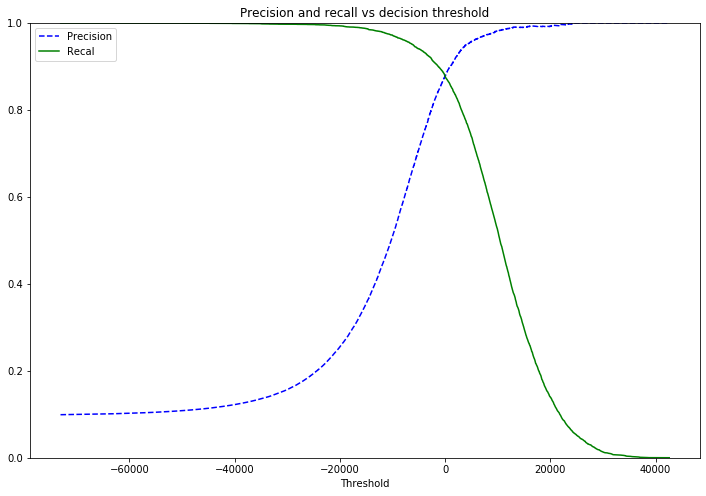

In [31]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_4, y_scores)

def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.figure(figsize=(12,8))
    plt.title('Precision and recall vs decision threshold')
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recal")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [ ]:
#Precizia măsoară numărul de pozitivi adevărați (valorile de 4 corect clasificate) ca raport din totalul eșantioanelor clasificate drept 4. TP / (TP + FP)

#Recall masoară numarul de pozitivi adevărați ca raport între numărul total de pozitivi. TP / TP + FN

In [ ]:
#În funcție de scenariu, modelul poate fi modificat pentru a încerca și maximiza una sau alta, 
#prinzând toate instanțele pozitive în detrimentul prinderii unor pozitive false. Sau să te asiguri 
#că o instanță pozitivă nu este niciodată identificată în mod fals ca negativă în detrimentul lipsei 
#unor cazuri pozitive

In [ ]:
# (ROC) curve face plot la rata adevarată pozitivă(recall) împotriva rata falsă pozitică (instanțe
#negative care sunt clasate greșit ca fiind pozitive). FPReste egal cu unu minus rata adevărat negativă,
#care este rata instanțelor negative care sunt clasate corect ca fiind negative. TNR mai este numită
#specificitate. De aici curba ROC descrie sensibilitatea (recall) față de 1-specificity.

#Pentru a le face plot avem nevoie de TPR și FPR pentru diverse valori prag, folosind roc_curve() ,
#apoi putem face plot pentru FPR împotriva TPR.

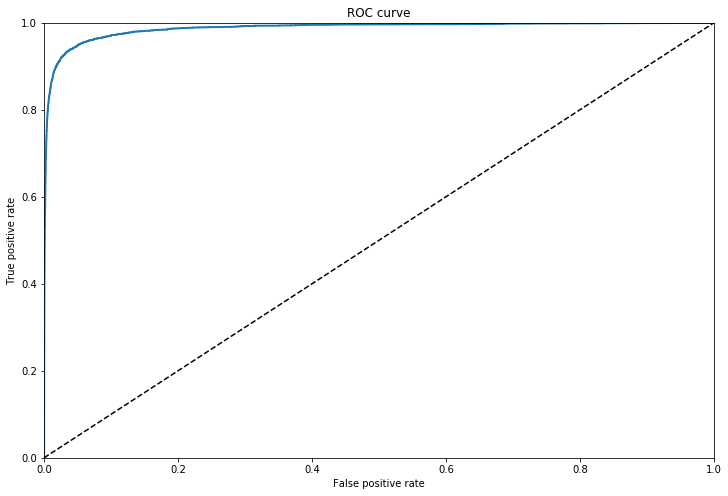

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_4,y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,8))
    plt.title('ROC curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

plot_roc_curve(fpr,tpr)
plt.show()

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_4, y_scores)

0.9874425803896669

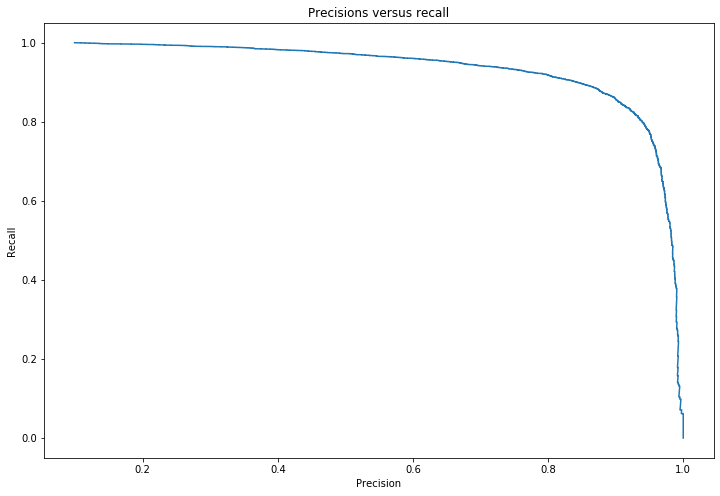

In [35]:
#Acest scor de 98% este înșelător pentru problemele în care clasa țintă constituie un procent mic din
#setul de date.Având în vedere curba de retragere a preciziei, este mai clar faptul că există loc
#pentru îmbunătățiri, curba ar putea fi mult mai aproape de colțul din dreapta sus.

def plot_p_r(precisions,recalls):
    plt.figure(figsize=(12,8))
    plt.title('Precisions versus recall')
    plt.plot(precisions[:-1],recalls[:-1])
    plt.xlabel('Precision')
    plt.ylabel('Recall')

plot_p_r(precisions,recalls)
plt.show()

C:\Users\TM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


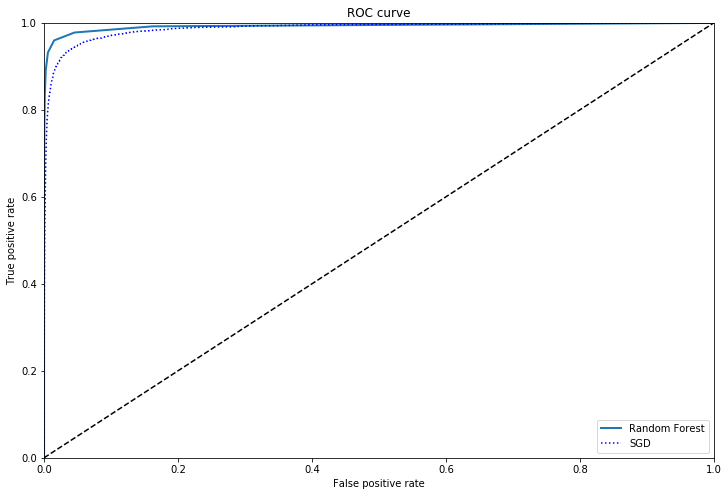

In [37]:
#Compararea modelelor folosind ROC curves
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)

y_prob_forest = cross_val_predict(forest,X_train,y_train_4,cv=3,method='predict_proba')
y_scores_forest = y_prob_forest[:,1]

fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_4,y_scores_forest)


plot_roc_curve(fpr_forest,tpr_forest, "Random Forest")
plt.plot(fpr,tpr,"b:",label="SGD")
plt.legend(loc="lower right")
plt.show()

In [38]:
roc_auc_score(y_train_4,y_scores_forest)

0.9927319021768999

In [ ]:
#Modelul Random Forest reprezintă o îmbunătățire clară față SGD în acest caz.

In [ ]:
#One v All
#Instruirea funcționează în același mod, SGD va crea 10 modele, similar cu modul în care am creat 
#clasificatorul nostru binar pentru a detecta 4, unul pentru fiecare număr. Aceasta este valoarea 
#implicită pentru majoritatea algoritmilor.

In [39]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([4], dtype=int8)

In [40]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-14694.31791841, -38159.04931964,  -3580.84915684,
         -7128.1048687 ,   4296.99163377,  -9347.99256268,
        -11742.32194645, -14325.35241504,  -6604.13697261,
         -7198.65358842]])

In [ ]:
#Acest tablou de scoruri corespunde celor 10 clase, cele mai mari scoruri, 4 în acest caz, vor fi 
#selectate ca răspuns anticipat.

In [41]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [42]:
#One V One
#Utilizarea one v one creează un clasificator binar pentru fiecare pereche de cifre, 0v1, 0v2, 1v2 
#etc creând 45 clasificatoare în total. Support Vector Machines(SVM) vor utiliza acest lucru în mod 
#implicit, deoarece timpul lor de formare crește exponențial cu seturi de antrenament mai mari,
#deci sunt preferate seturi mai mici. Orice model poate fi forțat să folosească OvO sau OvA.

from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=1000,tol=1e-3,random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([4], dtype=int8)

In [43]:
len(ovo_clf.estimators_)

45

In [44]:
#Evaluarea clasificatorilor
#Folosind cross_val_score
names = ['RandomForest','SGD OvA','SGD OvO']
classifiers = [forest,sgd_clf,ovo_clf]

for name, classifier in zip(names,classifiers):
    print('Cross val score for ',name,' : ',cross_val_score(classifier,X_train,y_train,scoring='accuracy'))

C:\Users\TM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\TM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Cross val score for  RandomForest  :  [0.93931214 0.94284714 0.94329149]


C:\Users\TM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Cross val score for  SGD OvA  :  [0.88107379 0.85969298 0.8700305 ]


C:\Users\TM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Cross val score for  SGD OvO  :  [0.91091782 0.91164558 0.91673751]


In [ ]:
#Model tuning
#Reglarea modelului și a caracteristicilor de intrare pentru a încerca și a îmbunătăți performanța

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

for name, classifier in zip(names,classifiers):
    print('Scaled cross val score for ',name,' : ',
          cross_val_score(classifier,X_train_scaled,y_train,scoring='accuracy'))

C:\Users\TM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\TM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scaled cross val score for  RandomForest  :  [0.93921216 0.94289714 0.9433415 ]


C:\Users\TM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Scaled cross val score for  SGD OvA  :  [0.89947011 0.90079504 0.90148522]


C:\Users\TM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Scaled cross val score for  SGD OvO  :  [0.91216757 0.91839592 0.91638746]


In [46]:
#RandomizedSearchCV
#Folosind cel mai bun model, vom parcurge 10 iterații pentru a încerca să găsim parametri optimi.
#Aici am creat un CV de căutare aleatorizat personalizat pentru a vizualiza scorurile pe măsură ce se
#termină fiecare iterație, stocând rezultatele și parametrii într-un cadru de date sortat în funcție
#de scorul CV mediu.
import itertools
import pandas as pd

def random_search_cv(param_grid,X,y,n_iter=10):
    keys,values = zip(*param_grid.items())
    combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]
    results = pd.DataFrame(columns=['mean_cv_score','params','iteration'],index=list(range(n_iter)))
    for i in range(n_iter):
        params = np.random.choice(combinations)
        f = RandomForestClassifier(**params)
        score = cross_val_score(f,X,y,cv=3)
        results.loc[i,'mean_cv_score']=score.mean()
        results.loc[i,'params']=str(params)
        results.loc[i,'iteration']=i
        print('Round : {}   Score : {}'.format(i,score))
        results.sort_values('mean_cv_score',inplace=True)
        results.reset_index()
    return results

In [47]:
param_grid = {'n_estimators' : np.arange(10,200,10),'bootstrap' : [True,False]}

In [48]:
results = random_search_cv(param_grid,X_train,y_train,n_iter=10)

Round : 0   Score : [0.96870626 0.9719986  0.96949542]
Round : 1   Score : [0.96865627 0.97224861 0.96969545]
Round : 2   Score : [0.96325735 0.96754838 0.96329449]
Round : 3   Score : [0.96910618 0.97164858 0.96949542]
Round : 4   Score : [0.96090782 0.96564828 0.96274441]
Round : 5   Score : [0.96880624 0.97274864 0.96994549]
Round : 6   Score : [0.9655069  0.9679484  0.96504476]
Round : 7   Score : [0.96325735 0.96774839 0.96484473]
Round : 8   Score : [0.9535093  0.95629781 0.95429314]
Round : 9   Score : [0.96390722 0.9679984  0.96639496]


In [49]:
results.head()

,mean_cv_score,params,iteration
8,0.9547,"{'n_estimators': 20, 'bootstrap': True}",8
4,0.9631,"{'n_estimators': 60, 'bootstrap': True}",4
2,0.9647,"{'n_estimators': 30, 'bootstrap': False}",2
7,0.965283,"{'n_estimators': 90, 'bootstrap': True}",7
9,0.9661,"{'n_estimators': 40, 'bootstrap': False}",9


In [ ]:
#Evaluarea erorilor
#Confusion Matrix
#Analizând matrix confusion, putem observa ce tipuri de erori face modelul nostru pentru a găsi 
#modalități de îmbunătățire a acestuia.

In [50]:
y_train_pred = cross_val_predict(forest, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

C:\Users\TM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[5802,    2,   22,    6,   11,    8,   30,    5,   35,    2],
       [   1, 6620,   35,   19,   14,    9,    5,    9,   21,    9],
       [  39,   29, 5637,   52,   41,   20,   27,   45,   51,   17],
       [  27,   20,  129, 5666,    7,  114,    9,   53,   75,   31],
       [  18,   15,   37,    9, 5541,    8,   40,   20,   32,  122],
       [  50,   17,   26,  190,   25, 4968,   48,   11,   51,   35],
       [  54,   16,   27,    4,   35,   61, 5694,    0,   24,    3],
       [  13,   35,   81,   25,   72,    6,    0, 5920,   18,   95],
       [  42,   55,   82,  114,   55,   92,   40,   17, 5280,   74],
       [  30,   25,   35,   90,  199,   49,   10,   81,   49, 5381]],
      dtype=int64)

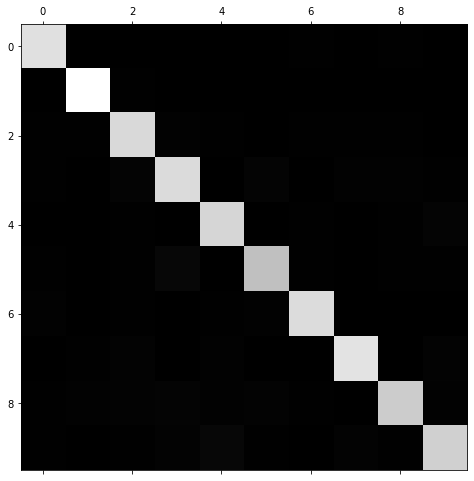

In [51]:
#Reprezentarea printr-o imagine a confusion matrix
plt.figure(figsize=(12,8))
plt.matshow(conf_mx,cmap=plt.cm.gray,fignum=1)

In [ ]:
#Încă foarte greu de înțeles ce se întâmplă, în prezent analizăm numărul de erori absolute care vor
#fi nereprezentative dacă unele caracteristici au puține instanțe. Normalizarea prin împărțirea la
#fiecare valoare la numărul de imagini din clasa ne va lăsa cu rata de eroare în schimb.

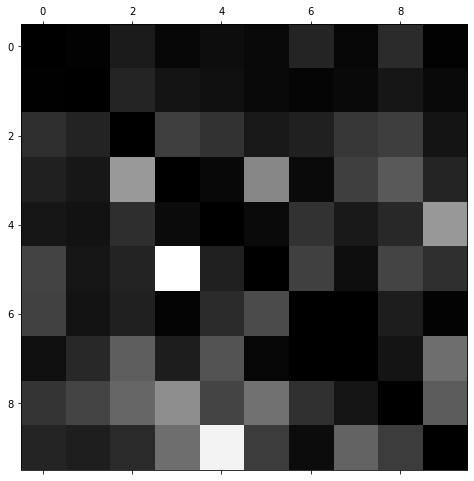

In [52]:
#Normed confusion matrix
#Completând și diagonalele rămânem doar cu erorile.
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx= conf_mx /row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.figure(figsize=(8,8))
plt.matshow(norm_conf_mx, cmap=plt.cm.gray,fignum=1)
plt.show()

In [ ]:
#Zonele luminoase arată unde erorile sunt cele mai profunde, coloanele 8 și 9 sunt luminoase, ceea ce
#înseamnă că cifrele devin adesea confuze pentru a fi 8 sau 9. Rândurile sunt, de asemenea, destul de
#luminoase pentru 8 și 9, adică 8 și 9 sunt adesea confundate cu alte cifre .

#3 și 5 sunt de asemenea confundate.

#Pentru a rezolva aceste probleme, am putea adăuga o altă caracteristică - un număr de bucle închise 
#- și să scriem un algoritm pentru a le detecta. De asemenea, am putea folosi software-ul de 
#preprocesare a imaginii pentru a face ca aceste și alte caracteristici să iasă în evidență mai clar
#pentru a ajuta modelul nostru nou sau existent să detecteze diferențele.

In [72]:
#Testarea modelului nostru pe setul de teste

#În scopul acestui proiect, după ce am testat mai multe clasificatoare, am efectuat teste scalând 
#caracteristicile de intrare și am reglat parametrii modelului suntem gata să folosimc cel mai
#performant model pentru a prezice pe setul de testare.



import ast
from sklearn.metrics import accuracy_score

best_params = ast.literal_eval(results['params'][0])
model = RandomForestClassifier(**best_params)
model.fit(X_train,y_train)

predictions = model.predict(X_test)


print('Train Accuracy:' ,accuracy_score(y_train,model.predict(X_train)))


Train Accuracy: 1.0


In [75]:
from sklearn.metrics.cluster import v_measure_score
v_measure_score(y_train, model.predict(X_train) )

1.0

In [76]:
from sklearn.metrics.cluster import v_measure_score
v_measure_score(y_test, model.predict(X_test) )

0.9256683315950638

In [3]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

X, y= fetch_openml('mnist_784', version=1,return_X_y=True)
data = scale(X)


In [4]:
n_samples, n_features = data.shape
n_digits = len(np.unique(y))
labels = y


In [5]:
sample_size = 10000

In [6]:
print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 70000, 	 n_features 784


In [7]:
print(82 * '_')
print('init\t\ttime\tinertia\t\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# în acest caz, însămânțarea centrelor este determinantă, de aceea rulăm algoritmul kmeans o singură 
#dată cu n_init = 1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

__________________________________________________________________________________
init		time	inertia		homo	compl	v-meas	ARI	AMI	silhouette


C:\Users\TM\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


k-means++	457.50s	42569503	0.420	0.442	0.431	0.321	0.420	0.009


C:\Users\TM\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


random   	418.66s	42570266	0.419	0.441	0.430	0.319	0.419	0.011


C:\Users\TM\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


PCA-based	43.90s	42569654	0.421	0.443	0.431	0.322	0.421	0.005
__________________________________________________________________________________


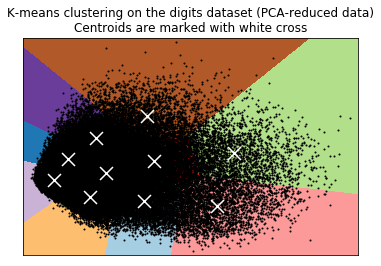

In [8]:
# Vizualizăm rezultatele în PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Mărimea pasului în mesh. 
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Trasăm limitele. Pentru aceasta, vom atribui o culoare fiecăruia
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obținem etichete pentru fiecare punct din mesh. Folosim ultimul model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Punem rezultatele într-un plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Le facem plot centroizilor sub forma unui X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [2]:
n_samples, n_features = data.shape
n_digits = len(np.unique(y))
labels = y

In [4]:
sample_size = 3000

In [3]:
print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 70000, 	 n_features 784


In [5]:
print(82 * '_')
print('init\t\ttime\tinertia\t\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

__________________________________________________________________________________
init		time	inertia		homo	compl	v-meas	ARI	AMI	silhouette


C:\Users\TM\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


k-means++	309.73s	42569503	0.420	0.442	0.431	0.321	0.420	0.002


C:\Users\TM\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


random   	289.36s	42570266	0.419	0.441	0.430	0.319	0.419	0.002


C:\Users\TM\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


PCA-based	30.02s	42569654	0.421	0.443	0.431	0.322	0.421	0.008
__________________________________________________________________________________


In [ ]:
#Aici am reluat, doar ca având un sample_size mai mic, dar vedem că valorile de la v-meas sunt exact la fel.